# Практическая работа №3:Регрессионный анализ
Выполнила студентка гр. 1375 Парфенова Екатерина. Вариант №20

## Цель работы
Ознакомление с основными положениями метода наименьших квадратов (МНК), со статистическими свойствами МНК-оценок, с понятием функции регрессии и роли МНК в регрессионном анализе.

## Основные теоретические положения
Модель линейной регрессии<br>
- Наблюдение (Y,z)
- Регрессионная модель:
$\mathbb{E}{\theta}(Y|z)=f_{\theta}(z)$<br>
- Линейная регрессионная модель:
$\mathbb{E}_{\theta}(Y|z)=x(z)^\intercal\beta,$где $\beta$ - вектор параметров регрессии, a $x(z)$ - вектор размерности регрессоров<br><br>

Оценивание<br>
- Статистические данные(Y,z)
- Линейная регрессионная модель:<br>
$\mathbb{E}_{\theta}(Y|z)=x(z)^\intercal\beta,$<br>
- Статистическая модель: <br>$\mathbb{E}_{\theta}(Y|z)=X^\intercal\beta$, $Var(Y|z) = \sigma^2E$<br><br>

Метод Наименьших Квадратов<br>
- Альтернативная форма записи модели линейной регрессии:<br>
$Y = X^\intercal\beta + \varepsilon, \mathbb{E}_{\theta}\varepsilon = 0, Var_{\theta}\varepsilon = \sigma^2E$, где $\varepsilon$ - вектор ошибок
- Метод наименьших квадратов:<br>
$RSS(\beta)=\left\| Y-X^\intercal\beta \right\|^2=(Y-X^\intercal\beta)^\intercal(Y-X^\intercal\beta)\to \min_\beta$<br>
- Нормальные уравнения: $XX^\intercal\beta=XY$<br>
- Решение системы нормальных уравнений в регулярном случае: $\hat{\beta}=(XX^\intercal)^{-1}XY$<br><br>

Оценка параметра $\sigma^2$<br>

- $S^2 =\frac{SS_e}{n-r} =\frac{RSS(\hat{\beta})}{n-r}$, где $r = rank X$
- $S^2$ - несмещенная оценка дисперсии<br>

ДНО функции параметра<br>

- Линейная функция параметра<br>

$\psi(\beta) = C^\intercal\beta$<br><br>

Фунция параметра $\psi(\beta) = C^\intercal\beta$ допускает несмещенное оценивание(ДНО), если $$\exists L(Y) = B Y : \forall \beta : \mathbb{E}_\beta L(Y) = C^\intercal\beta,$$ где $C$ - матрица $m \times q$, $q$ - длина функции параметра<br><br>

Теорема Гаусса-Маркова<br><br>

В модели линейной регрессии каждая ДНО-функция параметра $\psi(\beta) = C^\intercal\beta$, $C = (c_1, \dots, c_m)^\intercal$ имеет НРМД - оценку $\hat{\psi}$. Эта оценка единственна в классе линейных несмещенных оценок и равна $$\hat{\psi} = \sum_{i = 1}^{m}c_i\hat{\beta}_i$$, где $\hat{\beta}$ - произвольное решение системы нормальных уравнений.<br><br>

$Доверительное оценивание$<br>

- Классические предположения: $ Y \sim \mathcal{N}(X^\intercal\beta,\sigma^2E) $

- Эквивалентное предположение об остатках:  $ \varepsilon \sim \mathcal{N}(0,\sigma^2E) $

В сделанных предположениях оценка $\hat{\psi}$ имеет $\mathcal{N}(\psi,Г_\psi)$ - распределение и не зависит от $SS_e/\sigma^2$  имеющей $X_{n-r}^2$ -распределение.

Доверительный интервал<br>

- ДНО - функция: $\psi(\beta) = C^\intercal\beta$

- МНК оценка: $\hat{\psi}= C^\intercal\hat{\beta}$

- Элемент дисперсии оценки: $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

- Распределение: $\hat{\psi} \sim \mathcal{N}(\psi,\sigma^2b_\psi) $

- Распределение: $\frac{\hat{\psi} - {\psi}}{S\sqrt{b_\psi}} \sim S_{n-r}$

- Доверительный интервал уровня доверия $1-\alpha$: $\left[\hat{\psi} - x_\alpha S \sqrt{b_\psi}; \hat{\psi} + x_\alpha S \sqrt{b_\psi}\right],$ где $x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$<br>

Проверка гипотез<br>

Основная гипотеза $H_0:\psi=0$

$\mathbb{F}-статистика:$ $\frac{SS_H/q}{SS_e/(n-r)},$
где <br>
- $SS_H = RSS(\hat{\beta}_H) - RSS(\hat{\beta})$
- $\hat{\beta}_H$ - МНК оценка при выполнении основной гипотезы $\psi=0$
- $SS_e = RSS(\hat{\beta}_H) = s^2(n-r)$<br><br>

$\mathbb{F}$ - критерий
- $\mathbb{F}$ - статистика при основной гипотезе имеет распределение $\mathcal{F}_{q,n-r}$
- Граница критической области $x_\alpha: \mathcal{F}{q, n-r}(x_\alpha) = 1 - \alpha$
- $p-value: pv = 1 -  \mathcal{F}_{q, n-r}(\mathbb{F})$

## Постановка задачи
Результаты статистического эксперимента представлены в виде двух переменных. Требуется оценить характер (случайной) зависимости переменной Y от переменной X. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы


In [1487]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
import sympy

### Исходные данные

In [1488]:
s_Y = '10.43 10.33 10.37 10.28 10.19 10.46 10.53 10.30 10.19 10.44 10.31 10.32 10.15 10.42 10.10 10.32 10.44 10.40 10.23 10.42 10.32 10.30 10.20 10.46 10.29 10.64 10.41 10.23 10.25 10.45 10.42 10.29 10.45 10.40 10.46 10.41 10.24 10.42 10.12 10.55 10.42 10.38 10.40 10.16 10.36 10.26 10.17 10.15 10.34 10.57'
s_X = '2 0 2 0 0 2 1 0 0 1 0 2 0 2 0 1 2 0 0 2 2 0 0 2 0 1 1 0 0 1 1 0 2 1 2 1 0 1 0 1 2 2 1 0 1 0 0 0 1 2'

alpha = 0.20
h = 0.25

X = np.array([int(x) for x in s_X.split()])
Y = np.array([float(x) for x in s_Y.split()])
n_y = len(Y)
n_x = len(Y)

### 1


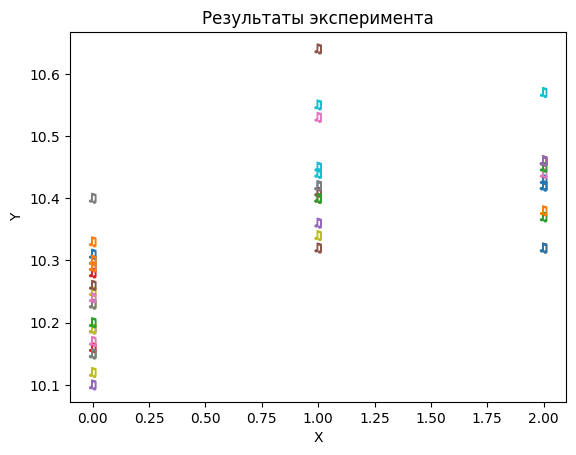

In [1489]:
plt.scatter(X, Y, marker='$\u266B$', s=50,
            color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',
                   '#17becf'] * 5)

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Результаты эксперимента')
plt.show()

Линейная регрессионная модель:
$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$<br>
$Y = \beta_0 + \beta_1 X + \varepsilon$,где<br>
$\beta_0$ и $\beta_1$ - коэффициенты регрессии,<br>
$\varepsilon$ -вектор ошибок.

In [1490]:
matrix_Y = np.matrix(Y).T
matrix_X = np.matrix([[1] * len(X), X])
matrix_X_XT = np.linalg.inv(matrix_X * matrix_X.T)
Beta = matrix_X_XT * matrix_X * matrix_Y
beta0, beta1 = Beta.A1
df_info = pd.DataFrame([beta0, beta1], index=['B0', 'B1'], columns=['Полученные значения'])
df_info.T

,B0,B1
Полученные значения,10.257742,0.101498


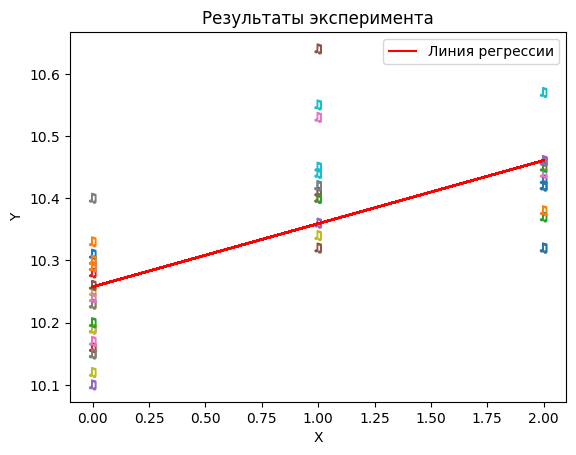

In [1491]:
plt.scatter(X, Y, marker='$\u266B$', s=50,
            color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',
                   '#17becf'] * 5)
plt.plot(X, beta0 + beta1 * np.array(X), color='r', label='Линия регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Результаты эксперимента')
plt.show()

Линейная приближает ненаглядно, возможно, для выбранных точек лучше подойдет модель с большим количеством параметров

### 2

In [1492]:
epsilon = matrix_Y - matrix_X.T * Beta
RSS = np.linalg.norm(matrix_Y - matrix_X.T * Beta) ** 2
unbiased_variance = RSS / (n_x - np.linalg.matrix_rank(matrix_X))
print(f"Несмещенная оценка дисперсии {round(unbiased_variance, 5)}")
df_epsilon = pd.DataFrame(epsilon, columns=["Вектор ошибок"])
df_epsilon

Несмещенная оценка дисперсии 0.00797


,Вектор ошибок
0,-0.030737
1,0.072258
2,-0.090737
3,0.022258
4,-0.067742
5,-0.000737
6,0.170760
7,0.042258
8,-0.067742
9,0.080760


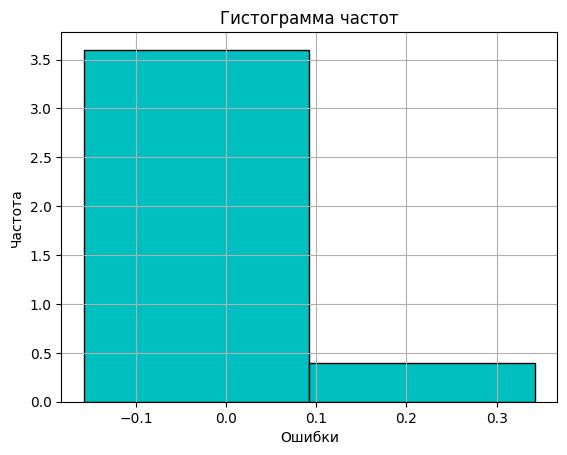

Сумма площадей стобцов гистограммы =  1.0


In [1493]:
bins = np.arange(np.min(epsilon),( np.max(epsilon) + h), h)
counts, _ = np.histogram(epsilon, bins=bins)
heights = counts/(len(epsilon)*h)
plt.bar(bins[:-1], heights, align='edge',color='c', width=h, edgecolor='black')
plt.title('Гистограмма частот')
plt.xlabel("Ошибки")
plt.grid()
plt.ylabel("Частота")
plt.show()
print("Сумма площадей стобцов гистограммы = ", sum(heights*h))


Основная гипотеза: $H_0 : \varepsilon \sim N(0,\sigma^2E)$<br>

Альтернативная гипотеза: $H_A : \varepsilon \nsim N(0,\sigma^2E) $<br>

Разобъем множество всех возможных значений СВ на интервалы и найдем вероятности попадания СВ в построенные интервалы

In [1494]:
intervals = np.histogram(epsilon, bins=11)
bin_edges, bin_counts = intervals[1], intervals[0]

ranges = [
    {'lower': bin_edges[0], 'upper': bin_edges[2], 'count': sum(bin_counts[:2])},
    {'lower': bin_edges[2], 'upper': bin_edges[3], 'count': sum(bin_counts[2:3])},
    {'lower': bin_edges[3], 'upper': bin_edges[4], 'count': sum(bin_counts[3:4])},
    {'lower': bin_edges[4], 'upper': bin_edges[6], 'count': sum(bin_counts[4:6])},
    {'lower': bin_edges[6], 'upper': bin_edges[10], 'count': sum(bin_counts[6:])},
]

print("Разобъем на следующие интервалы:")
first_interval = ranges[0]
print(f"I{1}(-∞,{round(first_interval['upper'], 6)}]: {first_interval['count']} элементов")
for i, interval in enumerate(ranges[1:-1], start=1):
    print(f"I{i + 1}[{round(interval['lower'], 6)}, {round(interval['upper'], 6)}): {interval['count']} элементов")
last_interval = ranges[-1]
print(f"I{len(ranges)}[{round(last_interval['lower'], 6)}, +∞): {last_interval['count']} элементов")

Разобъем на следующие интервалы:
I1(-∞,-0.078014]: 10 элементов
I2[-0.078014, -0.03815): 7 элементов
I3[-0.03815, 0.001713): 12 элементов
I4[0.001713, 0.081441): 15 элементов
I5[0.081441, +∞): 6 элементов


In [1495]:
mn_epsilon = 0
std_epsilon = np.sqrt(unbiased_variance)
index = [i for i in range(1, len(epsilon) + 1)]

P = []
ni = []

for interval in ranges:
    P_i = stats.norm.cdf(interval['upper'], loc=mn_epsilon, scale=std_epsilon) - stats.norm.cdf(interval['lower'],
                                                                                                loc=mn_epsilon,
                                                                                                scale=std_epsilon)
    P.append(P_i)
    ni.append(interval['count'])

standart = []
for i in range(len(P)):
    standart.append(((ni[i] - len(epsilon) * P[i]) ** 2) / (len(epsilon) * P[i]))

two_nPi_list = [len(epsilon) * Pi for Pi in P]
values_df = pd.DataFrame([ni, two_nPi_list, standart], index=['ni', 'n*Pi', 'Слагаемое'], columns=index[:(len(P))])
values_df

,1,2,3,4,5
ni,10.000000,7.000000,12.000000,15.000000,6.00000
n*Pi,7.625008,7.172432,8.652201,15.573053,8.86964
Слагаемое,0.739748,0.004145,1.295365,0.021087,0.92843


In [1496]:
print(f'Критерий X^2 = {round(sum(standart), 5)}')
chi_value = stats.chi2.ppf(1 - alpha, len(P) - 1)
print(f'Уровень значимости = {alpha}')
print(f'Значение X^2 c {len(P) - 1} степенями свободы = {round(chi_value, 5)}')

print("Статистика критерия Колмогорова Dn:",
      round(stats.kstest([element for element in np.asarray(epsilon.T)[0]], "norm", args=(mn_epsilon, std_epsilon)).statistic, 5))
print(f"Xalpha:{round(stats.kstwobign.ppf(1 - alpha) / np.sqrt(len(epsilon)), 5)}")

Критерий X^2 = 2.98878
Уровень значимости = 0.2
Значение X^2 c 4 степенями свободы = 5.98862
Статистика критерия Колмогорова Dn: 0.08991
Xalpha:0.15171


Получили:
$\chi^2$ = 2.98878 <br>
$\chi_{r-1}^2$ = 5.98862 с уровнем значимости $\alpha = 0.2$<br>
$\chi^2<\chi_{4}^2$ по критерию Пирсона отвергаем данную гипотезу<br>
$D_n \approx 0.08981$<br>

$x_{\alpha} \approx 0.15171$<br>

$D_n < x_{\alpha}$ отвергаем гипотезу

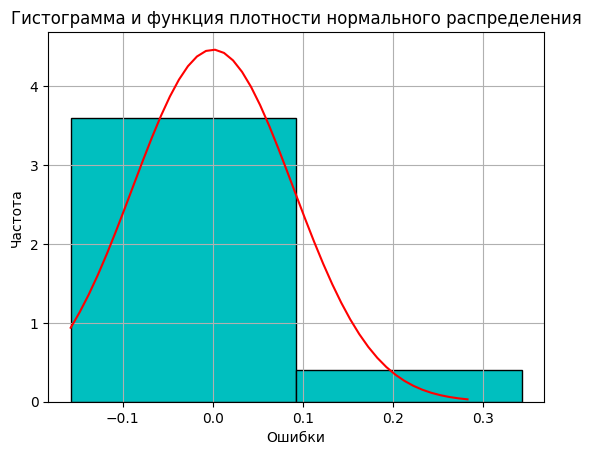

In [1497]:
bins = np.arange(np.min(epsilon), np.max(epsilon) + h, h)
plt.hist(epsilon, bins=bins, color='c', edgecolor='black', density=True)
plt.plot(np.arange(np.min(epsilon), np.max(epsilon) + 0.01, 0.01),
         stats.norm.pdf(np.arange(np.min(epsilon), np.max(epsilon) + 0.01, 0.01), mn_epsilon, std_epsilon), color='r')
plt.title('Гистограмма и функция плотности нормального распределения')
plt.xlabel("Ошибки")
plt.grid()
plt.ylabel("Частота")
plt.show()

С таким шагом сделать выводы сложно. Поэтому уменьшим шаг для визуального оценивания

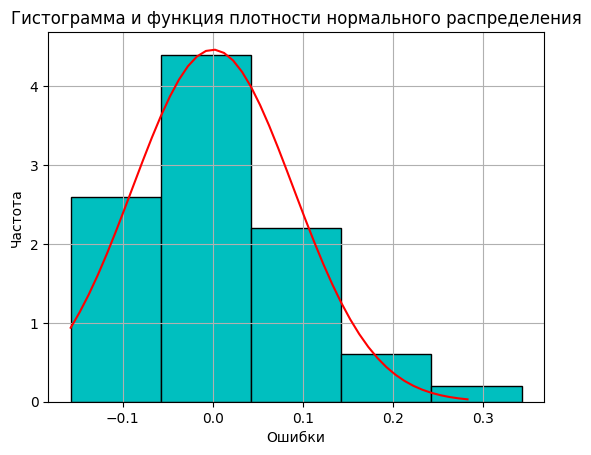

In [1498]:
bins = np.arange(np.min(epsilon), np.max(epsilon) + 0.1, 0.1)
plt.hist(epsilon, bins=bins, color='c', edgecolor='black', density=True)
plt.plot(np.arange(np.min(epsilon), np.max(epsilon) + 0.01, 0.01),
         stats.norm.pdf(np.arange(np.min(epsilon), np.max(epsilon) + 0.01, 0.01), mn_epsilon, std_epsilon), color='r')
plt.title('Гистограмма и функция плотности нормального распределения')
plt.xlabel("Ошибки")
plt.grid()
plt.ylabel("Частота")
plt.show()

Визуально видно, что распределение похоже на нормальное.

### 3
Доверительный интервал для $\beta_0$<br>
ДНО-функция: <br>
$\psi(β) = C^\intercal \beta $<br>

$C = (1, 0)^\intercal$<br>

НРМД оценка<br>
$\hat{\psi} = \sum_{j=1}^m c_j\hat{\beta}_j=\hat{β_0}$<br>

Доверительный интервал:<br>
$\psi \in \left[\hat{\psi} - x_\alpha S \sqrt{b}; \hat{\psi} + x_\alpha S \sqrt{b}\right] $ <br>

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$

$b = C^\intercal(XX^\intercal)^{-1}C$


In [1499]:
r = np.linalg.matrix_rank(matrix_X)
C = np.matrix([[1], [0]])
b_psi = C.T * matrix_X_XT * C
x_alpha = stats.t.ppf(1 - alpha / 2, df=n_x - r)
int_l = (beta0 - x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_psi)).A1
int_r = (beta0 + x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_psi)).A1
q = len(Beta)
print(f"Квантиль ={round(x_alpha, 5)}")
print(f"Доверительный интервал:\n[{round(int_l[0], 5)};{round(int_r[0], 5)}]")

Квантиль =1.29944
Доверительный интервал:
[10.23444;10.28104]


Доверительный интервал для $\beta_1$<br>
ДНО-функция: <br>
$\psi(β) = C^\intercal \beta $<br>

$C = (0, 1)^\intercal$<br>

НРМД оценка<br>
$\hat{\psi} = \sum_{j=1}^m c_j\hat{\beta}_j=\hat{β_1}$<br>

Доверительный интервал:<br>
$\psi \in \left[\hat{\psi} - x_\alpha S \sqrt{b}; \hat{\psi} + x_\alpha S \sqrt{b}\right] $ <br>

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$

$b = C^\intercal(XX^\intercal)^{-1}C$


In [1500]:
r = np.linalg.matrix_rank(matrix_X)
C = np.matrix([[0], [1]])
b_psi = C.T * matrix_X_XT * C
x_alpha = stats.t.ppf(1 - alpha / 2, df=n_x - r)
int_l = (beta1 - x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_psi)).A1
int_r = (beta1 + x_alpha * np.sqrt(unbiased_variance) * np.sqrt(b_psi)).A1
print(f"Квантиль ={round(x_alpha, 5)}")
print(f"Доверительный интервал:\n[{round(int_l[0], 5)};{round(int_r[0], 5)}]")

Квантиль =1.29944
Доверительный интервал:
[0.0818;0.12119]


Доверительный эллипс для параметра $(\beta_0, \beta_1)$:<br>

ДНО-функция: <br>
$\psi = C^\intercal \beta = (\beta_0, \beta_1)^\intercal$<br>

$C = \begin{pmatrix}1 & 0 \\0 & 1\end{pmatrix}$<br>

МНК оценка<br>
$\hat{\psi} = (\hat{\beta}_0, \hat{\beta}_1)^\intercal$<br>

Доверительный эллипс:<br>
$\{ \vec{x}: (\vec{x}-\hat{\psi})^\intercal B^{-1}(\vec{x}-\hat{\psi}) \leq qs^2x_α\}$

$x_\alpha: \mathcal{F}{q, n-r}(x_\alpha) = 1 - \alpha$, $b_\psi = C^\intercal(XX^\intercal)^{-1}C$

In [1501]:
C = np.eye(2)
b = C.T * matrix_X_XT * C
print('b =\n',Beta)
psi = C.T * Beta
print('psi =\n' ,psi)
b_inv = np.linalg.inv(b)
print('Обратная B =\n',b_inv)
q = len(Beta)
x_alpha = stats.f.ppf(1-alpha, dfn=q, dfd=n_x - r)
print(f"Квантиль: {x_alpha}")

b =
 [[10.25774194]
 [ 0.1014977 ]]
psi =
 [[10.25774194]
 [ 0.1014977 ]]
Обратная B =
 [[50. 42.]
 [42. 70.]]
Квантиль: 1.6646290755148485



$\frac{\lambda_1x^2}{qS^2x_\alpha}+\frac{\lambda_2y}{qS^2x_\alpha}=1$<br>


In [1502]:
eigenvalue,eigenvector = np.linalg.eig(b_inv)
print(f"Собственные числа: {eigenvalue}")
print(f"Собственные векторы:\n {eigenvector}")
coefficients = (eigenvalue / (x_alpha * q * unbiased_variance))**0.5
array_ones = np.ones(2)
a,b = array_ones/coefficients
print('Коэффициенты',coefficients)
print(f'Полуоси: {a} и {b}')

Собственные числа: [ 16.82593371 103.17406629]
Собственные векторы:
 [[-0.78473579 -0.61983041]
 [ 0.61983041 -0.78473579]]
Коэффициенты [25.17481692 62.33931241]
Полуоси: 0.03972223524056297 и 0.016041242055403873


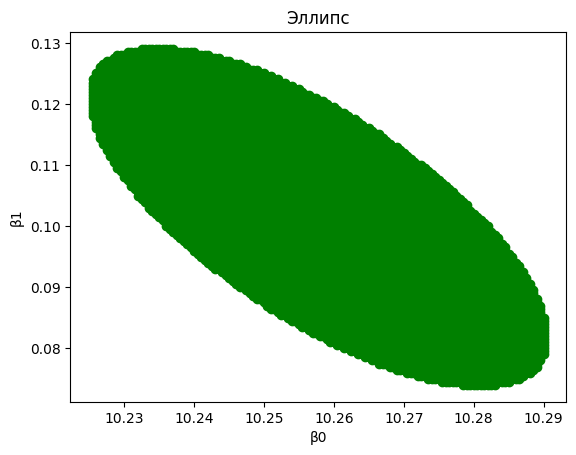

In [1503]:
C = np.eye(2)
matrix_b0=[]
matrix_b1= []
for x in np.arange(10.2, 10.3, 0.0005):
    for y in np.arange(0, 0.2, 0.0005):
        vector_x = np.asmatrix([[x],[ y]])
        x_psi = vector_x - psi
        if x_psi.T*b_inv*x_psi <= q*unbiased_variance*x_alpha:
            matrix_b0.append(x)
            matrix_b1.append(y)
plt.title('Эллипс')
plt.xlabel('β0')
plt.ylabel('β1')
plt.scatter(matrix_b0, matrix_b1,color='g')
plt.show()


### 4
Основная гипотеза: $H_0 : \psi = 0$


In [1505]:
beta0_4 = sum(Y) / n_y
beta1_4 = 0
Beta_4 = np.matrix([[beta0_4], [beta1_4]])
F_stat = (np.linalg.norm(matrix_Y - matrix_X.T * Beta_4) ** 2 - np.linalg.norm(
    matrix_Y - matrix_X.T * Beta) ** 2) /( 2 * unbiased_variance)
print(f"Оценка вектора бета при выполнении основной гипотезы: ({beta0_4}, {beta1_4})")
print(f"F-cтатистика = {F_stat}")
print(f"Квантиль x_alpha = {stats.f.ppf(1 - alpha, dfn=2, dfd=n_x - r)}")

Оценка вектора бета при выполнении основной гипотезы: (10.343, 0)
F-cтатистика = 22.426578844242613
Квантиль x_alpha = 1.6646290755148485


$\mathbb{F} \approx 22.427$<br>

$x_{\alpha} \approx 1.665$<br>

$\mathbb{F} > x_{\alpha_2}$  гипотеза отвергается

### 5
Линейная регрессионная модель:

$\mathbb{E}_{\theta}(Y|z) = x(z)^{\intercal}\beta$<br>

$Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \varepsilon$<br>


In [1506]:
matrix_Y_2 = np.matrix(Y).T
matrix_X_2 = np.matrix([[1] * n_x, X, [x ** 2 for x in X]])
matrix_X_XT_2 = np.linalg.inv(matrix_X_2 * matrix_X_2.T)
Beta_2 = matrix_X_XT_2 * matrix_X_2 * matrix_Y_2
beta0, beta1, beta2 = Beta_2.A1
df_info = pd.DataFrame([beta0, beta1, beta2], index=['B0', 'B1', 'B2'], columns=['Полученные значения'])

df_info.T

,B0,B1,B2
Полученные значения,10.233636,0.308117,-0.106753


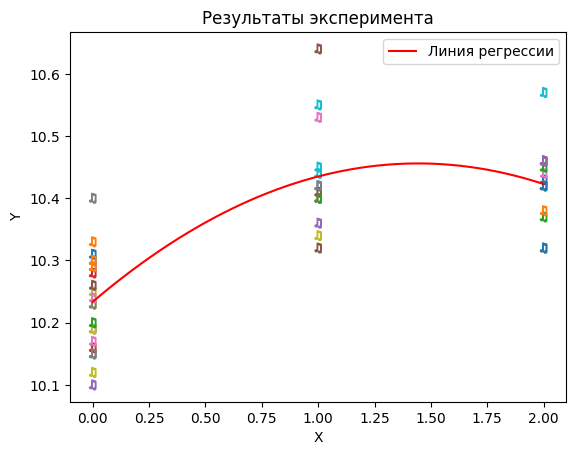

In [1507]:
quadratic_regression = lambda x, b0, b1, b2: b0 + b1 * x + b2 * x ** 2
x_range = np.linspace(min(X), max(X), 150)

plt.scatter(X, Y, marker='$\u266B$', s=50,
            color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22',
                   '#17becf'] * 5)
plt.plot(x_range, quadratic_regression(x_range, beta0, beta1, beta2), color='r', label='Линия регрессии')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('Результаты эксперимента')
plt.show()

### 6

In [1508]:
epsilon_2 = matrix_Y_2 - matrix_X_2.T * Beta_2
RSS_2 = np.linalg.norm(matrix_Y_2 - matrix_X_2.T * Beta_2) ** 2
unbiased_variance_2 = RSS_2 / (n_x - np.linalg.matrix_rank(matrix_X_2))
bins = np.arange(np.min(epsilon_2), (np.max(epsilon_2) + h), h)
print(f"Несмещенная оценка дисперсии {round(unbiased_variance_2, 5)}")
df_epsilon = pd.DataFrame(epsilon_2, columns=["Вектор ошибок"])
df_epsilon

Несмещенная оценка дисперсии 0.00573


,Вектор ошибок
0,0.007143
1,0.096364
2,-0.052857
3,0.046364
4,-0.043636
5,0.037143
6,0.095000
7,0.066364
8,-0.043636
9,0.005000


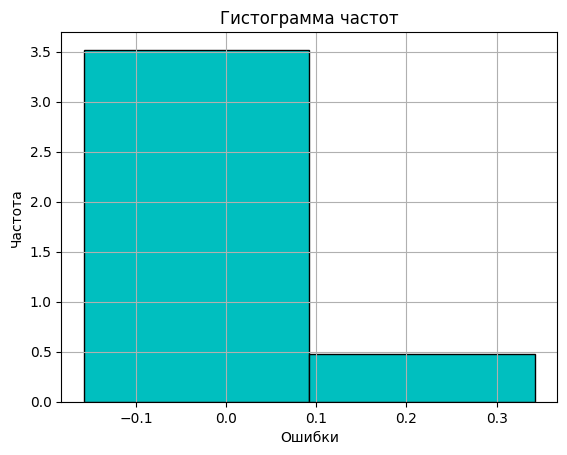

Сумма площадей стобцов гистограммы =  1.0


In [1522]:

bins = np.arange(np.min(epsilon),( np.max(epsilon) + h), h)
plt.hist(epsilon_2, bins=bins, color='c', edgecolor='black', density=True)
plt.title('Гистограмма частот')
plt.xlabel("Ошибки")
plt.grid()
plt.ylabel("Частота")
plt.show()
print("Сумма площадей стобцов гистограммы = ", sum(heights*h))

Основная гипотеза: $H_0 : \varepsilon \sim N(0,\sigma^2E)$<br>

Альтернативная гипотеза: $H_A : \varepsilon \nsim N(0,\sigma^2E) $<br>

Разобъем множество всех возможных значений СВ на интервалы и найдем вероятности попадания СВ в построенные интервалы

In [1510]:
intervals = np.histogram(epsilon_2, bins=11)
bin_edges, bin_counts = intervals[1], intervals[0]

ranges = [
    {'lower': bin_edges[0], 'upper': bin_edges[1], 'count': sum(bin_counts[:2])},
    {'lower': bin_edges[2], 'upper': bin_edges[4], 'count': sum(bin_counts[2:4])},
    {'lower': bin_edges[4], 'upper': bin_edges[5], 'count': sum(bin_counts[4:5])},
    {'lower': bin_edges[5], 'upper': bin_edges[7], 'count': sum(bin_counts[5:7])},
    {'lower': bin_edges[7], 'upper': bin_edges[10], 'count': sum(bin_counts[7:])},
]

print("Разобъем на следующие интервалы:")
first_interval = ranges[0]
print(f"I{1}(-∞,{round(first_interval['upper'], 6)}]: {first_interval['count']} элементов")
for i, interval in enumerate(ranges[1:-1], start=1):
    print(f"I{i + 1}[{round(interval['lower'], 6)}, {round(interval['upper'], 6)}): {interval['count']} элементов")
last_interval = ranges[-1]
print(f"I{len(ranges)}[{round(last_interval['lower'], 6)}, +∞): {last_interval['count']} элементов")

Разобъем на следующие интервалы:
I1(-∞,-0.102851]: 10 элементов
I2[-0.072066, -0.010496): 12 элементов
I3[-0.010496, 0.020289): 11 элементов
I4[0.020289, 0.08186): 11 элементов
I5[0.08186, +∞): 6 элементов


In [1511]:
mn_epsilon_2 = 0
std_epsilon_2 = np.sqrt(unbiased_variance_2)
index = [i for i in range(1, len(epsilon) + 1)]

P = []
ni = []

for interval in ranges:
    P_i = stats.norm.cdf(interval['upper'], loc=mn_epsilon, scale=std_epsilon) - stats.norm.cdf(interval['lower'],
                                                                                                loc=mn_epsilon,
                                                                                                scale=std_epsilon)
    P.append(P_i)
    ni.append(interval['count'])

standart = []
for i in range(len(P)):
    standart.append(((ni[i] - len(epsilon) * P[i]) ** 2) / (len(epsilon) * P[i]))

two_nPi_list = [len(epsilon) * Pi for Pi in P]
values_df = pd.DataFrame([ni, two_nPi_list, standart], index=['ni', 'n*Pi', 'Слагаемое'], columns=index[:(len(P))])
values_df

,1,2,3,4,5
ni,10.000000,12.000000,11.000000,11.000000,6.000000
n*Pi,2.872426,12.169448,6.832484,11.523913,7.705994
Слагаемое,17.686205,0.002359,2.542002,0.023819,0.377682


In [1512]:
print(f'Критерий X^2 = {round(sum(standart), 5)}')
chi_value = stats.chi2.ppf(1 - alpha, len(P) - 1)
print(f'Уровень значимости = {alpha}')
print(f'Значение X^2 c {len(P) - 1} степенями свободы = {round(chi_value, 5)}')
p_value = stats.chi2.cdf(sum(standart), len(P) - 1)
print("Статистика критерия Колмогорова Dn:",
      round(stats.kstest([element for element in np.asarray(epsilon_2.T)[0]], "norm", args=(mn_epsilon_2, std_epsilon_2)).statistic, 5))
print(f"Xalpha:{round(stats.kstwobign.ppf(1 - alpha) / np.sqrt(len(epsilon)), 5)}")

Критерий X^2 = 20.63207
Уровень значимости = 0.2
Значение X^2 c 4 степенями свободы = 5.98862
Статистика критерия Колмогорова Dn: 0.0719
Xalpha:0.15171


По критерию Пирсона <br>
$\chi^2$ = 20.63207 <br>
$\chi_{r-1-d}^2$ =  3.21888 с уровнем значимости $\alpha = 0.2$<br>
$\chi^2>\chi_{4}^2$  есть основания отвергнуть данную гипотезу<br><br>
По критерию Колмагорова <br>
$D_n \approx 0.0719$<br>
$x_{\alpha} \approx 0.15171$<br>
$D_n < x_{\alpha}$ нет оснований отвергнуть данную гипотезу о нормальности<br>

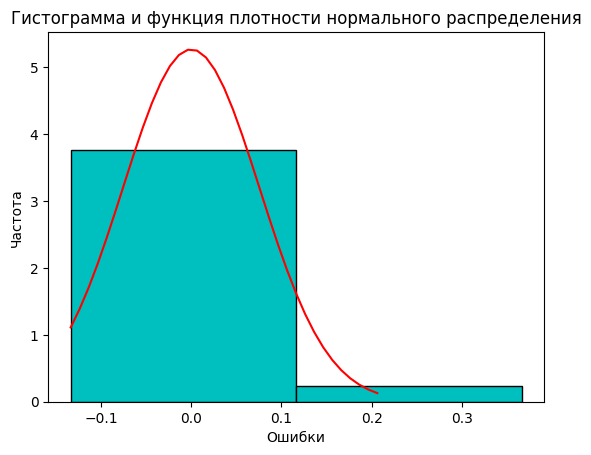

In [1513]:
bins = np.arange(np.min(epsilon_2), np.max(epsilon_2) + h, h)
plt.hist(epsilon_2, bins=bins, color='c', edgecolor='black', density=True)
plt.plot(np.arange(np.min(epsilon_2), np.max(epsilon_2) + 0.01, 0.01),
         stats.norm.pdf(np.arange(np.min(epsilon_2), np.max(epsilon_2) + 0.01, 0.01), mn_epsilon_2, std_epsilon_2),
         color='r')
plt.title('Гистограмма и функция плотности нормального распределения')
plt.xlabel("Ошибки")
plt.ylabel("Частота")
plt.show()

С таким шагом сделать выводы сложно. Поэтому уменьшим шаг для визуального оценивания

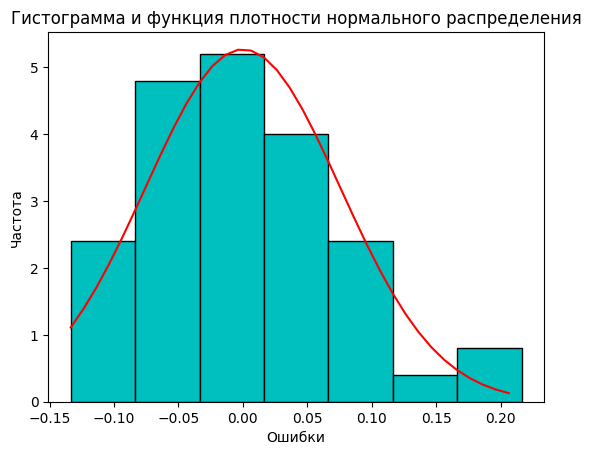

In [1514]:
bins = np.arange(np.min(epsilon_2), np.max(epsilon_2) + 0.05, 0.05)
plt.hist(epsilon_2, bins=bins, color='c', edgecolor='black', density=True)
plt.plot(np.arange(np.min(epsilon_2), np.max(epsilon_2) + 0.01, 0.01),
         stats.norm.pdf(np.arange(np.min(epsilon_2), np.max(epsilon_2) + 0.01, 0.01), mn_epsilon_2, std_epsilon_2),
         color='r')
plt.title('Гистограмма и функция плотности нормального распределения')
plt.xlabel("Ошибки")
plt.ylabel("Частота")
plt.show()

Графическое представление показывает, что распределение ошибок визуально соответствует нормальному распределению, но с некоторыми отклонениями от типичной формы распределения.

### 7

Доверительный интервал для $\beta_0$<br>
ДНО-функция: <br>
$\psi(β) = C^\intercal \beta $<br>

$C = (1, 0,0)^\intercal$<br>

НРМД оценка<br>
$\hat{\psi} = \sum_{j=1}^m c_j\hat{\beta}_j=\hat{β_0}$<br>

Доверительный интервал:<br>
$\psi \in \left[\hat{\psi} - x_\alpha S \sqrt{b}; \hat{\psi} + x_\alpha S \sqrt{b}\right] $ <br>

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$<br>

$b_\psi = C^\intercal(XX^\intercal)^{-1}C$<br>


In [1515]:
r = np.linalg.matrix_rank(matrix_X_2)
C = np.matrix([[1], [0], [0]])
b_psi = C.T * matrix_X_XT_2 * C
x_alpha = stats.t.ppf(1 - alpha / 2, df=n_x - r)
int_l = (beta0 - x_alpha * np.sqrt(unbiased_variance_2) * np.sqrt(b_psi)).A1
int_r = (beta0 + x_alpha * np.sqrt(unbiased_variance_2) * np.sqrt(b_psi)).A1
print(f"Квантиль ={round(x_alpha, 5)}")
print(f"Доверительный интервал:\n[{round(int_l[0], 5)};{round(int_r[0], 5)}]")

Квантиль =1.29982
Доверительный интервал:
[10.21265;10.25462]


Доверительный интервал для $\beta_1$<br>
ДНО-функция: <br>
$\psi(β) = C^\intercal \beta $<br>

$C = (0, 1,0)^\intercal$<br>

НРМД оценка<br>
$\hat{\psi} = \sum_{j=1}^m c_j\hat{\beta}_j=\hat{β_1}$<br>

Доверительный интервал:<br>
$\psi \in \left[\hat{\psi} - x_\alpha S \sqrt{b}; \hat{\psi} + x_\alpha S \sqrt{b}\right] $ <br>

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$<br>

$b_\psi = C^\intercal(XX^\intercal)^{-1}C$<br>


In [1516]:
r = np.linalg.matrix_rank(matrix_X_2)
C = np.matrix([[0], [1], [0]])
b_psi = C.T * matrix_X_XT_2 * C
x_alpha = stats.t.ppf(1 - alpha / 2, df=n_x - r)
int_l = (beta1 - x_alpha * np.sqrt(unbiased_variance_2) * np.sqrt(b_psi)).A1
int_r = (beta1 + x_alpha * np.sqrt(unbiased_variance_2) * np.sqrt(b_psi)).A1
print(f"Квантиль ={round(x_alpha, 5)}")
print(f"Доверительный интервал:\n[{round(int_l[0], 5)};{round(int_r[0], 5)}]")

Квантиль =1.29982
Доверительный интервал:
[0.24541;0.37083]


Доверительный интервал для $\beta_2$<br>
ДНО-функция: <br>
$\psi(β) = C^\intercal \beta $<br>

$C = (0, 0,1)^\intercal$<br>

НРМД оценка<br>
$\hat{\psi} = \sum_{j=1}^m c_j\hat{\beta}_j=\hat{β_2}$<br>

Доверительный интервал:<br>
$\psi \in \left[\hat{\psi} - x_\alpha S \sqrt{b}; \hat{\psi} + x_\alpha S \sqrt{b}\right] $ <br>

$x_\alpha: S_{n-r}(x_\alpha) = 1 - \frac{\alpha}{2}$<br>

$b_\psi = C^\intercal(XX^\intercal)^{-1}C$<br>


In [1517]:
r = np.linalg.matrix_rank(matrix_X_2)
C = np.matrix([[0], [0], [1]])
b_psi = C.T * matrix_X_XT_2 * C
x_alpha = stats.t.ppf(1 - alpha / 2, df=n_x - r)
int_l = (beta2 - x_alpha * np.sqrt(unbiased_variance_2) * np.sqrt(b_psi)).A1
int_r = (beta2 + x_alpha * np.sqrt(unbiased_variance_2) * np.sqrt(b_psi)).A1
print(f"Квантиль ={round(x_alpha, 5)}")
print(f"Доверительный интервал:\n[{round(int_l[0], 5)};{round(int_r[0], 5)}]")

Квантиль =1.29982
Доверительный интервал:
[-0.13798;-0.07552]


Доверительный эллипсоид уровня доверия $1- α$ для $ (β_0,β_1) $

$ A_α =\{ \vec{x}: (\vec{x}-\hat{\psi})^\intercal B^{-1}(\vec{x}-\hat{\psi}) \leq qs^2x_α\}$


$x_\alpha: F_{q,n-r}(x_\alpha) = 1 - α$

$ B= C^\intercal(XX^\intercal)^{-1}C $

q - размер вектора $\psi$, т.е. q=3

$ C=\begin{pmatrix} 1 & 0&0 \\ 0 & 1&0 \\0&0&1 \end{pmatrix} $

$\hat{\psi} = C^\intercal \beta=(β_0,β_1,β_2)$

In [1518]:
C = np.eye(3)
B = C.T * matrix_X_XT_2 * C
print('B =\n',B)
psi = C.T * Beta_2
print('psi =\n' ,psi)
B_inv = np.linalg.inv(B)
print('Обратная B =\n',B)
q = len(Beta_2)
x_alpha = stats.f.ppf(1-alpha, dfn=q, dfd=n_x - r)
print(f"Квантиль: {x_alpha}")
x, y, z = sympy.symbols('x y z', real=True)
x_vec = np.matrix([[x], [y], [z]])
expr = (x_vec - Beta_2).T * B_inv * (x_vec - Beta_2)
print(f"Неравенство: {expr[0,0].as_poly().as_expr()} <= {q * unbiased_variance_2 * x_alpha}")

B =
 [[ 0.04545455 -0.06818182  0.02272727]
 [-0.06818182  0.40584416 -0.19480519]
 [ 0.02272727 -0.19480519  0.10064935]]
psi =
 [[10.23363636]
 [ 0.30811688]
 [-0.10675325]]
Обратная B =
 [[ 0.04545455 -0.06818182  0.02272727]
 [-0.06818182  0.40584416 -0.19480519]
 [ 0.02272727 -0.19480519  0.10064935]]
Квантиль: 1.6085202639061869
Неравенство: 49.9999999999997*x**2 + 83.9999999999994*x*y + 139.999999999999*x*z - 1034.3*x + 69.9999999999997*y**2 + 251.999999999999*y*z - 875.859999999996*y + 237.999999999999*z**2 - 1459.53999999999*z + 5349.35335519482 <= 0.027674571139563255


Неравенство:<br>
$49.9999999999997x^2 + 83.9999999999994xy + 139.999999999999xz - 1034.3x + 69.9999999999997y^2 + 251.999999999999yz - 875.859999999996y + 237.999999999999z^2 - 1459.53999999999z + 5349.35335519482 \leq 0.027674571139563255$

$\lambda_1x^2+\lambda_2y^2+\lambda_2z^2 \leq qS^2x_\alpha$<br>

In [1519]:
eigenvalue,_ = np.linalg.eig(B_inv)
print(f"Собственные числа: {eigenvalue}")
coefficients = eigenvalue / (x_alpha * q * unbiased_variance_2)**0.5
print('Коэффициенты',coefficients)

Собственные числа: [329.2444229   26.80091984   1.95465726]
Коэффициенты [1979.14665821  161.10508562   11.74979168]


$1979x'+161y'+12z' = 1$

### 8

Основная гипотеза: $H_0 : \psi = 0$

In [1520]:
Beta_8 = np.linalg.inv(matrix_X * matrix_X.T) * matrix_X * matrix_Y_2
beta0_8, beta1_8 = Beta_8.A1
beta2_8 = 0
Beta_8 = np.matrix([[beta0_8], [beta1_8], [beta2_8]])
F_stat = (np.linalg.norm(matrix_Y_2 - matrix_X_2.T * Beta_8) ** 2 - np.linalg.norm(
    matrix_Y_2 - matrix_X_2.T * Beta_2) ** 2) / len(Beta_2) / unbiased_variance
print(
    f"Оценка вектора бета при выполнении основной гипотезы: ({round(beta0_8, 5)}, {round(beta1_8, 5)},{round(beta2_8, 5)})")
print(f"F-cтатистика = {round(F_stat, 5)}")
print(f"Квантиль x_alpha = {round(stats.f.ppf(1 - alpha, dfn=q, dfd=n_x - r), 5)}")


Оценка вектора бета при выполнении основной гипотезы: (10.25774, 0.1015,0)
F-cтатистика = 4.73294
Квантиль x_alpha = 1.60852


$\mathbb{F} \approx 4.73294$<br>

$x_{\alpha} \approx 1.60852$<br>

$\mathbb{F} > x_{\alpha_2}$ нет оснований отвергнуть гипотезу

## Выводы
Отработаны навыки построения МНК оценок, доверительных эллипсов и эллипсоидов, а также проведения проверок гипотез о независимости и линейной регрессионной зависимости. Получены выводы относительно нормальности вектора ошибок.
